In [150]:
import PyWGCNA
import numpy as np
import pandas as pd
import gseapy
import os
import re

In [121]:
pd.set_option('display.max_columns',24)

In [2]:
import os
# os.chdir('/Users/fenn/Documents/Co68/RNA-seq/HT29')
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/WGCNA')
os.listdir()


['resMCB.p']

In [3]:
MCB = PyWGCNA.readWGCNA('resMCB.p')
MCB

Reading MCB WGCNA done!


In [9]:
MCB.save = True

In [4]:
MCB.datExpr.var.head()

dynamicColors          moduleColors  moduleLabels
0610009B22Rik                 linen                 linen            12
0610010F05Rik                 linen                 linen            12
0610010K14Rik  lightgoldenrodyellow  lightgoldenrodyellow             9
0610012G03Rik            whitesmoke            whitesmoke            18
0610030E20Rik            whitesmoke            whitesmoke            18

In [14]:
geneExpData = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/FPKM/gene_fpkm_VB12_LPS_All.csv', index_col=0)
geneExpData = geneExpData.T
# geneExpData.to_csv('./RAW_LPS-MCB_FPKM_T.csv')
geneExpData

Geneid         0610005C13Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
DMSO1                   0.26          26.39           0.19           0.76   
DMSO2                   0.04          25.77           0.18           0.59   
DMSO3                   0.04          25.77           0.18           0.59   
LPS-1h                  0.11          17.47           0.00           0.19   
LPS-2h                  0.05          12.64           0.03           0.51   
LPS-3h                  0.23          11.30           0.08           0.31   
RAW-LPS_1               0.23          14.60           0.16           0.21   
RAW_LPS_2               0.18          12.51           0.06           0.24   
RAW-LPS_3               0.11          10.59           0.00           0.78   
RAW-LPS-MyD88           0.11          18.17           0.40           4.12   
RAW-LPS-TRIF            0.00          13.63           0.04           0.98   
MCB1                    0.14          15.55           0.20           0.42   
MCB2                    0.18          13.06           0.22           0.00   
LPS-MCB1                0.10           5.06           0.04           0.27   
LPS-MCB2                0.11           9.60           0.00           0.10   
RAW-MCB-MyD88           0.11           7.35           0.08           0.50   
RAW-MCB-TLR4            0.11          15.10           0.16           0.41   
RAW-L68C                0.08          24.26           0.27           0.30   
RAW-LPS-L68             0.07           6.37           0.00           0.13   
RAW-L68                 0.09          22.51           0.25           0.24   
RAW-Fe68                0.17          20.67           0.25           0.16   

Geneid         0610010F05Rik  0610010K14Rik  0610012G03Rik  0610030E20Rik  \
DMSO1                  11.72          19.58           6.90          15.12   
DMSO2                  11.60          24.35           7.26          17.73   
DMSO3                  11.60          24.35           7.26          17.73   
LPS-1h                 10.87          25.25           5.22           5.65   
LPS-2h                  9.35          29.71           6.07           6.82   
LPS-3h                  9.37          28.11           5.99           8.18   
RAW-LPS_1              12.66          20.26           3.59          15.26   
RAW_LPS_2              13.09          20.03           2.86          16.05   
RAW-LPS_3              13.14          18.25           8.05          13.82   
RAW-LPS-MyD88           5.56          91.51          23.43          11.07   
RAW-LPS-TRIF           12.29          25.74           6.86          19.19   
MCB1                    7.54          19.29           8.28          33.09   
MCB2                    7.49          16.10          10.00          34.03   
LPS-MCB1                3.28          25.08           6.62          24.47   
LPS-MCB2                3.91          24.24           5.89          23.12   
RAW-MCB-MyD88           8.21          36.22           3.84          11.16   
RAW-MCB-TLR4            9.79          35.72           5.11           8.37   
RAW-L68C               10.35          24.80          10.14          13.98   
RAW-LPS-L68             8.99          19.27           2.17           8.26   
RAW-L68                 9.19          39.47           8.14          11.14   
RAW-Fe68               10.99          21.17           6.19          18.46   

Geneid         0610031O16Rik  0610038B21Rik  ...  Zxda  Zxdb  Zxdc  Zyg11a  \
DMSO1                   0.00           0.50  ...  0.81  2.71  4.92    0.27   
DMSO2                   0.00           0.48  ...  0.42  1.50  3.49    0.49   
DMSO3                   0.00           0.48  ...  0.42  1.50  3.49    0.49   
LPS-1h                  0.00           0.12  ...  0.91  1.95  2.37    0.12   
LPS-2h                  0.00           0.21  ...  0.92  1.46  2.46    0.07   
LPS-3h                  0.00           0.04  ...  0.48  1.28  2.07    0.05   
RAW-LPS_1               0.00           0.38  ...  0.58  1.54  2.

In [9]:
geneExp = './RAW_LPS-MCB_FPKM_T.csv'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='MCB', 
                              species='mus musculus', 
                            #   species='homo sapiens',
                              geneExpPath=geneExp, 
                              outputPath='./WGCNA',
                              save=True)
pyWGCNA_5xFAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


0610005C13Rik  0610009B22Rik  0610009E02Rik  0610009L18Rik  \
DMSO1            0.26          26.39           0.19           0.76   
DMSO2            0.04          25.77           0.18           0.59   
DMSO3            0.04          25.77           0.18           0.59   
LPS-1h           0.11          17.47           0.00           0.19   
LPS-2h           0.05          12.64           0.03           0.51   

        0610010F05Rik  0610010K14Rik  0610012G03Rik  0610030E20Rik  \
DMSO1           11.72          19.58           6.90          15.12   
DMSO2           11.60          24.35           7.26          17.73   
DMSO3           11.60          24.35           7.26          17.73   
LPS-1h          10.87          25.25           5.22           5.65   
LPS-2h           9.35          29.71           6.07           6.82   

        0610031O16Rik  0610038B21Rik  ...  Zxda  Zxdb  Zxdc  Zyg11a  Zyg11b  \
DMSO1             0.0           0.50  ...  0.81  2.71  4.92    0.27   12.00   
DMSO2             0.0           0.48  ...  0.42  1.50  3.49    0.49    9.77   
DMSO3             0.0           0.48  ...  0.42  1.50  3.49    0.49    9.77   
LPS-1h            0.0           0.12  ...  0.91  1.95  2.37    0.12    7.03   
LPS-2h            0.0           0.21  ...  0.92  1.46  2.46    0.07    4.88   

          Zyx  Zzef1   Zzz3     a  ccdc198  
DMSO1    4.42   9.45  21.17  0.42     0.00  
DMSO2    1.91   7.87  14.33  0.06     0.00  
DMSO3    1.91   7.87  14.33  0.06     0.00  
LPS-1h  12.74   6.88  13.50  0.00     0.00  
LPS-2h  14.10   3.66  14.92  0.00     0.09  

[5 rows x 25239 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



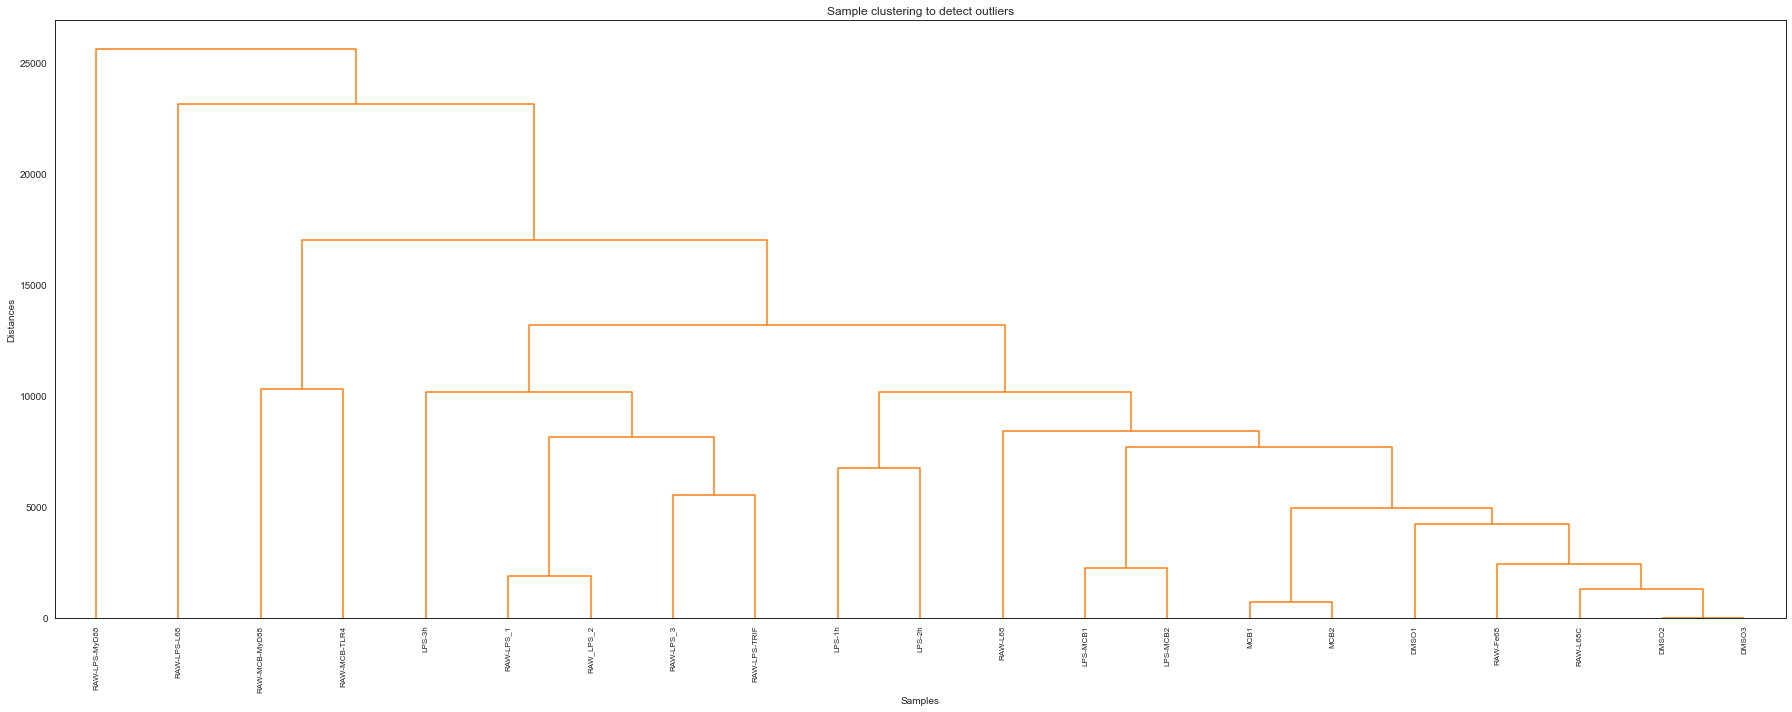

In [10]:
pyWGCNA_5xFAD.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  3606
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.188109  0.478498       0.779547  2343.157083  2317.128298   
1       2  0.072946 -0.255894       0.762832  1183.940948  1105.883687   
2       3  0.384788  -0.64439       0.833007   704.802587   631.488843   
3       4  0.578017 -0.871379       0.877328   461.155973   388.948873   
4       5  0.675922 -1.014148       0.903777   321.132406   256.120769   
5       6  0.726069 -1.135384       0.916292   233.826137   176.805887   
6       7  0.755759 -1.218792       0.926872   176.106086   127.233981   
7       8  0.769196 -1.282823       0.931389   136.216102    93.895913   
8       9   0.76725 -1.359651       0.929535   107.670012    71.587943   
9      10   0.77396 -1.417052       0.933494    86.656656    54.923501   
10     11  0.781383 -1.454474       0.939008    70.821979    42.353503   
11     13

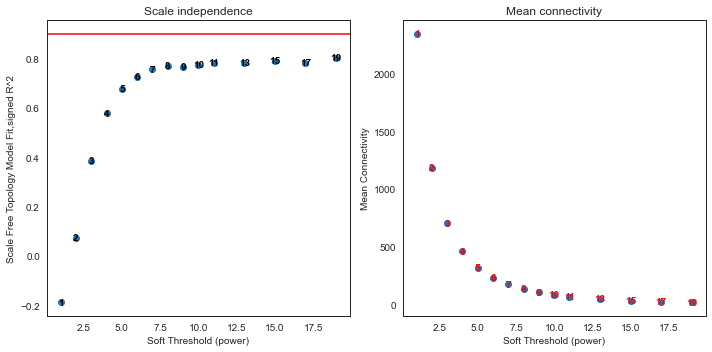

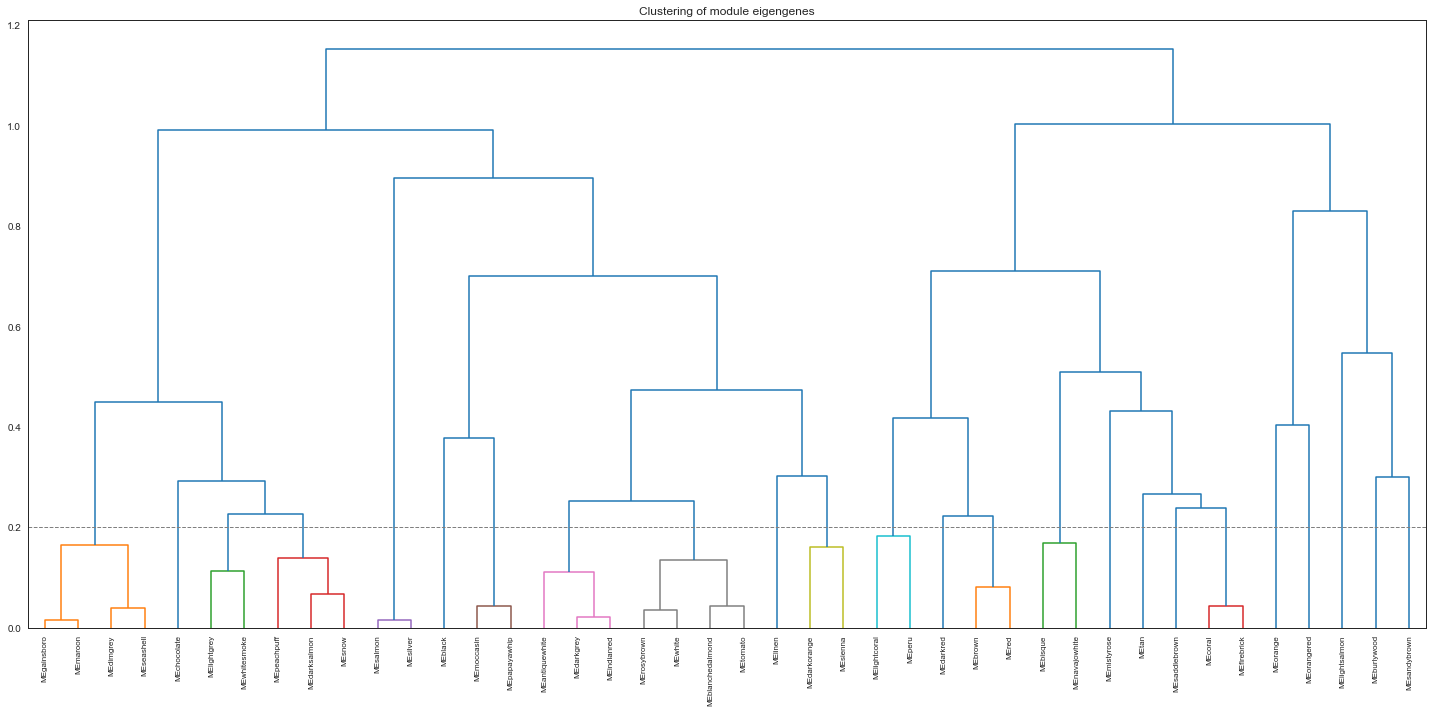

In [11]:
pyWGCNA_5xFAD.findModules()

In [15]:
geneExpData.index

Index(['DMSO1', 'DMSO2', 'DMSO3', 'LPS-1h', 'LPS-2h', 'LPS-3h', 'RAW-LPS_1',
       'RAW_LPS_2', 'RAW-LPS_3', 'RAW-LPS-MyD88', 'RAW-LPS-TRIF', 'MCB1',
       'MCB2', 'LPS-MCB1', 'LPS-MCB2', 'RAW-MCB-MyD88', 'RAW-MCB-TLR4',
       'RAW-L68C', 'RAW-LPS-L68', 'RAW-L68', 'RAW-Fe68'],
      dtype='object')

In [21]:
infoMeta = pd.DataFrame({'Condition':['DMSO', 'DMSO', 'DMSO', 'LPS', 'LPS', 'LPS', 'RAW-LPS',
       'RAW-LPS', 'RAW-LPS', 'RAW-LPS-MyD88', 'RAW-LPS-TRIF', 'MCB',
       'MCB', 'LPS-MCB', 'LPS-MCB', 'RAW-MCB-MyD88', 'RAW-MCB-TLR4',
       'RAW-DMSO', 'RAW-LPS-L68', 'RAW-L68', 'RAW-DMSO']}, index=geneExpData.index)
infoMeta.to_csv('./sampleMeta.csv')

In [22]:
sampleMeta = pd.read_csv('./sampleMeta.csv')
sampleMeta

Unnamed: 0      Condition
0           DMSO1           DMSO
1           DMSO2           DMSO
2           DMSO3           DMSO
3          LPS-1h            LPS
4          LPS-2h            LPS
5          LPS-3h            LPS
6       RAW-LPS_1        RAW-LPS
7       RAW_LPS_2        RAW-LPS
8       RAW-LPS_3        RAW-LPS
9   RAW-LPS-MyD88  RAW-LPS-MyD88
10   RAW-LPS-TRIF   RAW-LPS-TRIF
11           MCB1            MCB
12           MCB2            MCB
13       LPS-MCB1        LPS-MCB
14       LPS-MCB2        LPS-MCB
15  RAW-MCB-MyD88  RAW-MCB-MyD88
16   RAW-MCB-TLR4   RAW-MCB-TLR4
17       RAW-L68C       RAW-DMSO
18    RAW-LPS-L68    RAW-LPS-L68
19        RAW-L68        RAW-L68
20       RAW-Fe68       RAW-DMSO

In [23]:
sampleMeta['Condition'].drop_duplicates()

0              DMSO
3               LPS
6           RAW-LPS
9     RAW-LPS-MyD88
10     RAW-LPS-TRIF
11              MCB
13          LPS-MCB
15    RAW-MCB-MyD88
16     RAW-MCB-TLR4
17         RAW-DMSO
18      RAW-LPS-L68
19          RAW-L68
Name: Condition, dtype: object

In [25]:
pyWGCNA_5xFAD.updateSampleInfo(path='./sampleMeta.csv', sep=',')
pyWGCNA_5xFAD.setMetadataColor('Condition', {'DMSO': 'green',
                                       'LPS': 'red',
                                       'RAW-LPS':'red',
                                       'RAW-LPS-MyD88':'blue',
                                       'RAW-LPS-TRIF': 'blue',
                                       'MCB':'yellow',
                                       'LPS-MCB':'brown',
                                       'RAW-MCB-MyD88':'cyan',
                                       'RAW-MCB-TLR4':'cyan',
                                       'RAW-DMSO':'green',
                                       'RAW-LPS-L68':'red',
                                       'RAW-L68': 'gray'
                                       })

In [34]:
pyWGCNA_5xFAD.geneExpr.var.head()

gene_name
0610005C13Rik  0610005C13Rik
0610009B22Rik  0610009B22Rik
0610009E02Rik  0610009E02Rik
0610009L18Rik  0610009L18Rik
0610010F05Rik  0610010F05Rik

In [32]:
geneInfo = pd.DataFrame({'gene_name':geneExpData.columns}, index=geneExpData.columns)
geneInfo.head()
geneInfo.shape
pyWGCNA_5xFAD.updateGeneInfo(geneInfo)

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
	Done..



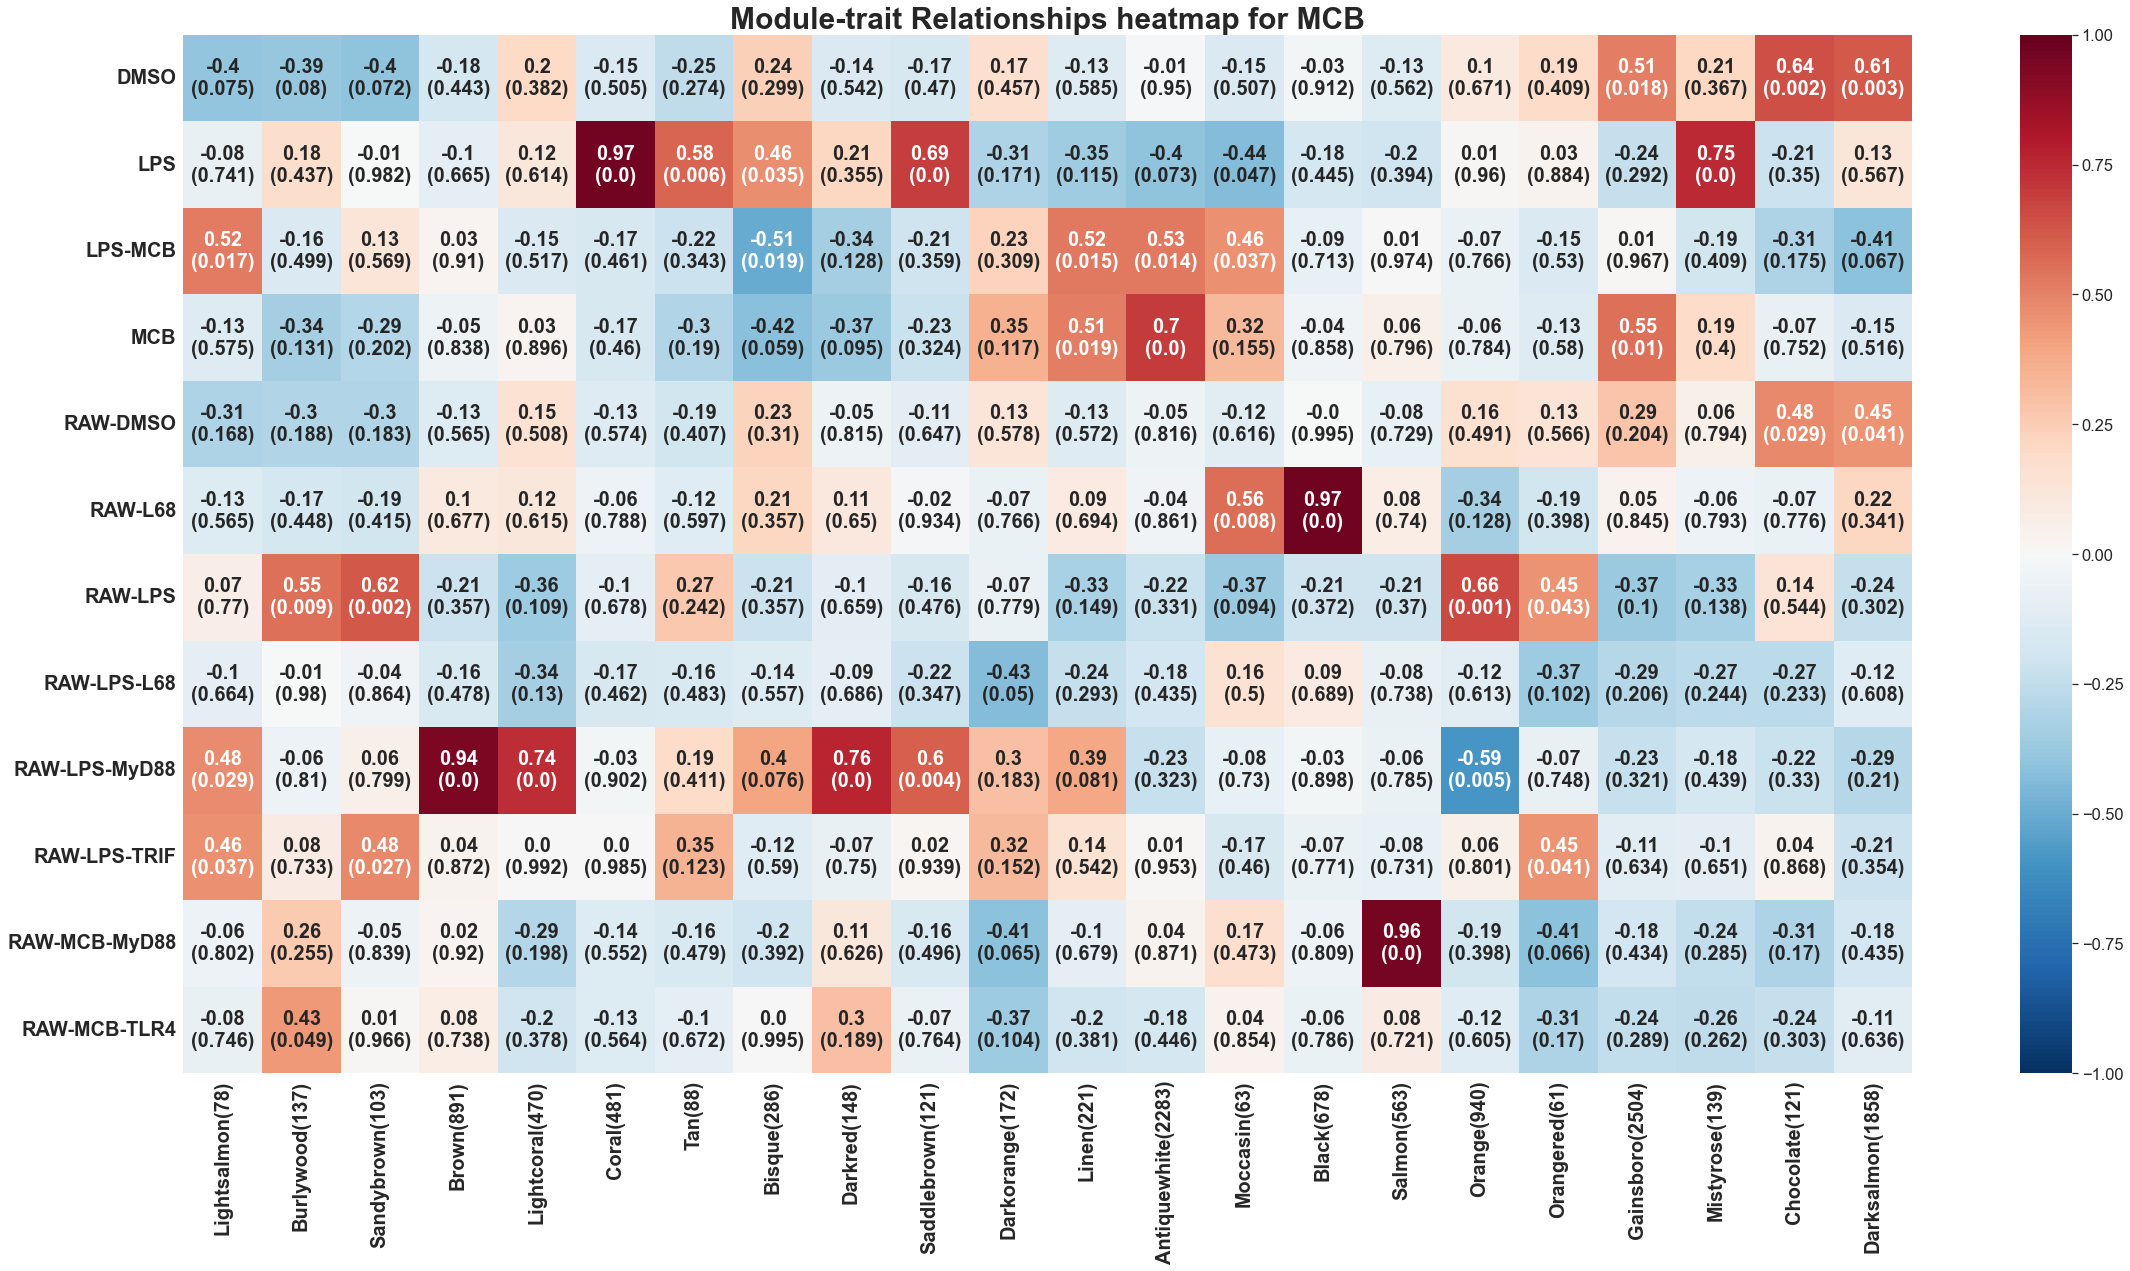

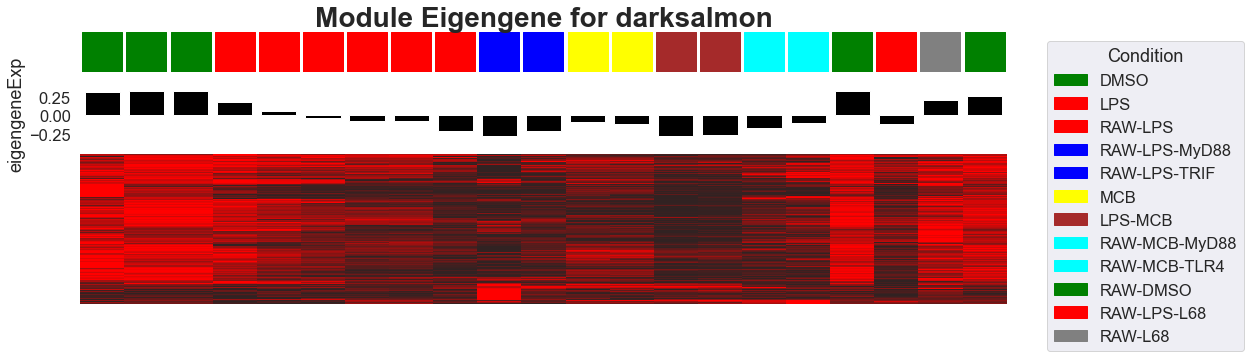

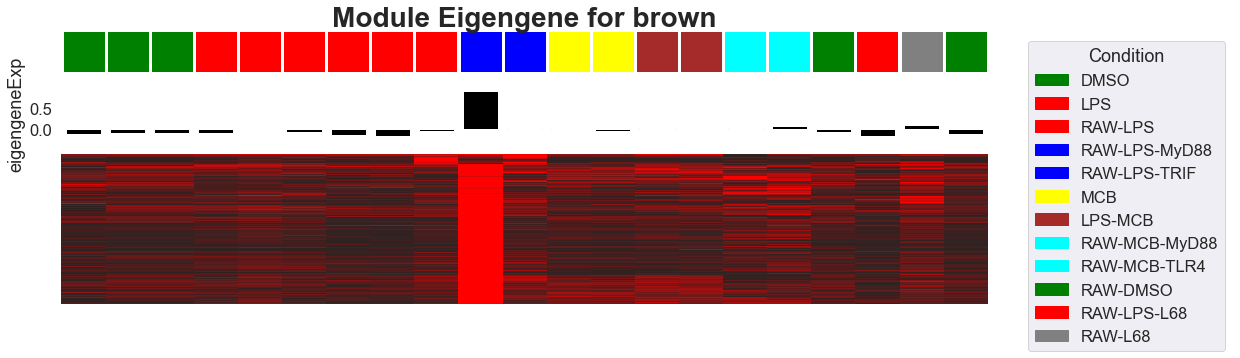

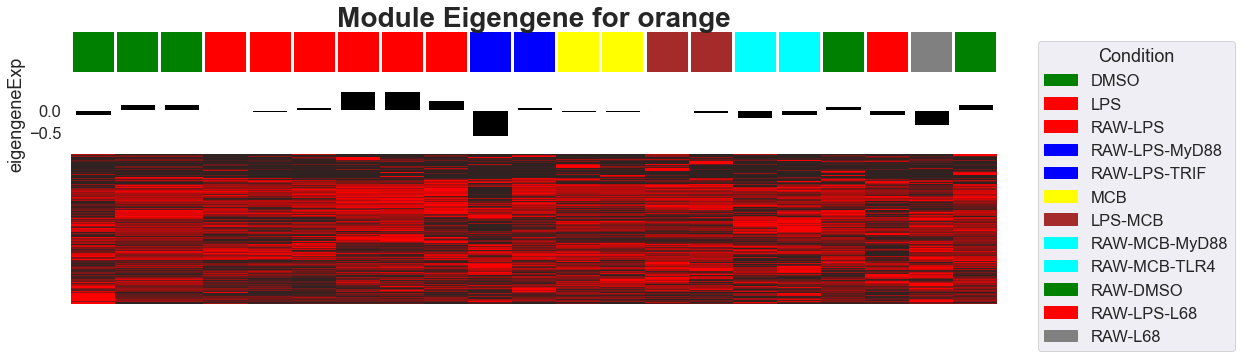

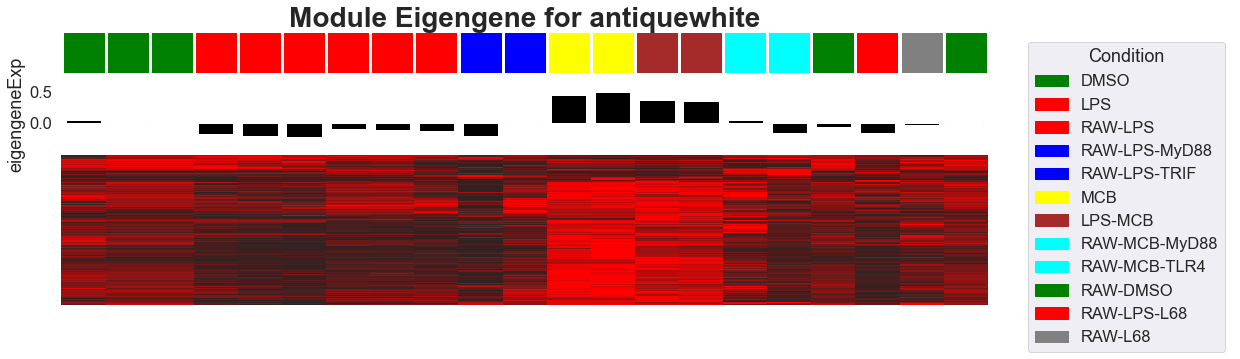

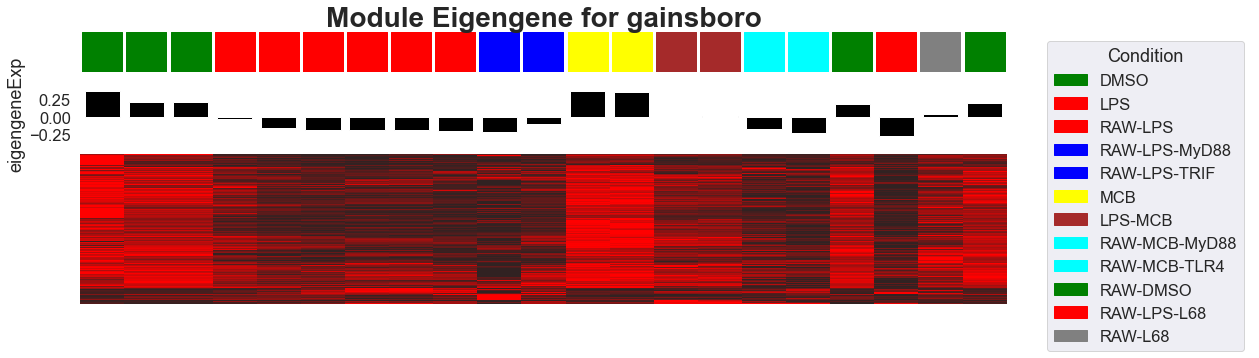

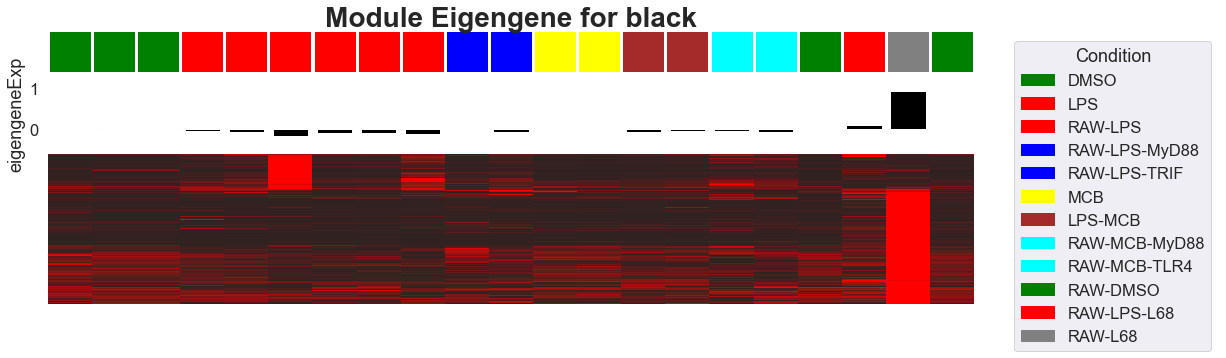

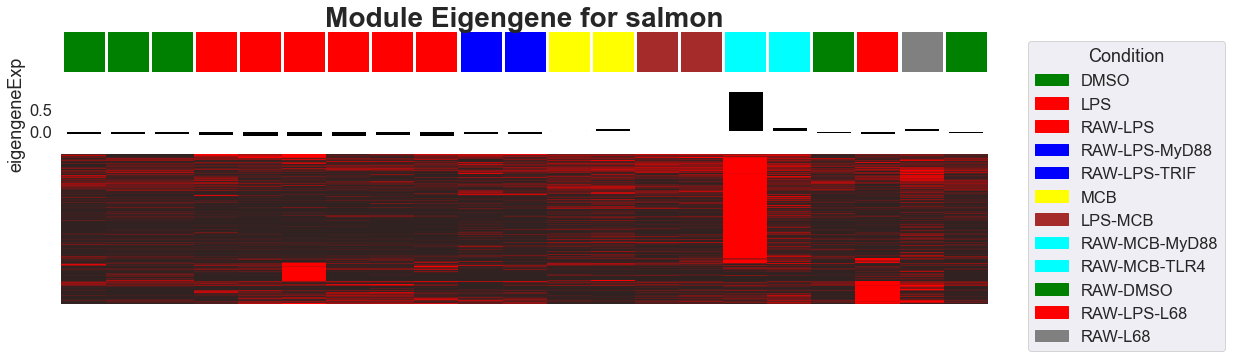

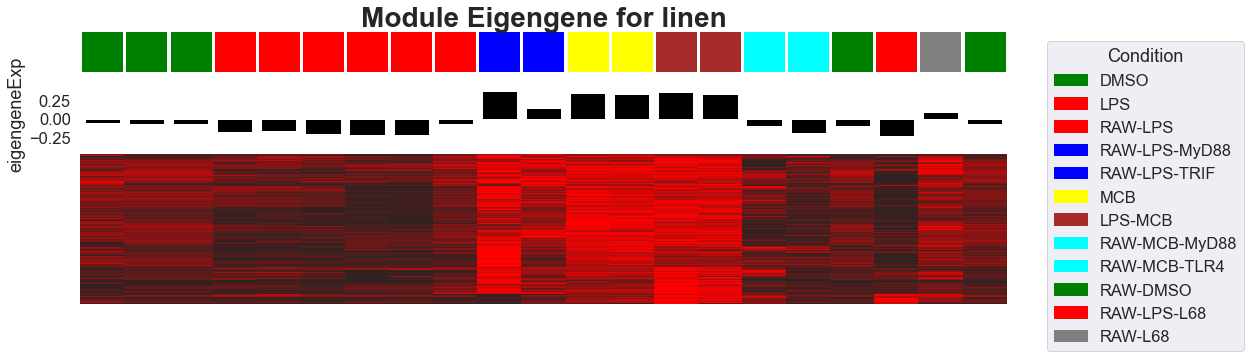

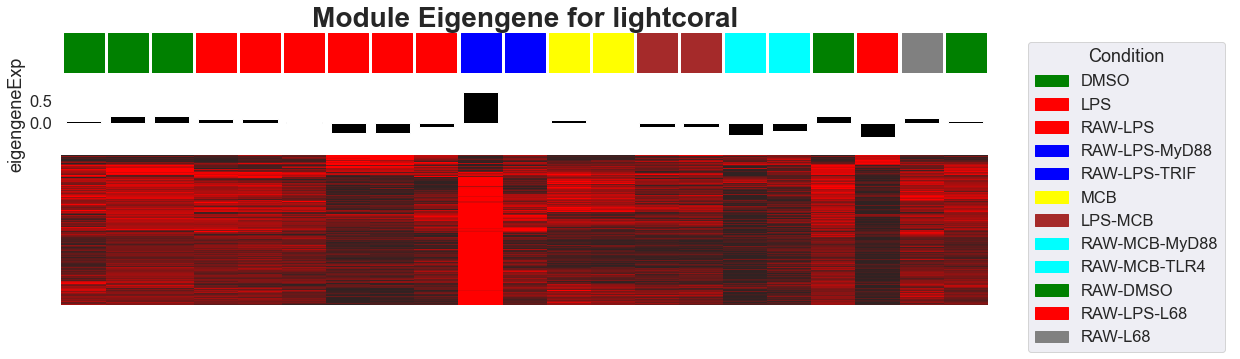

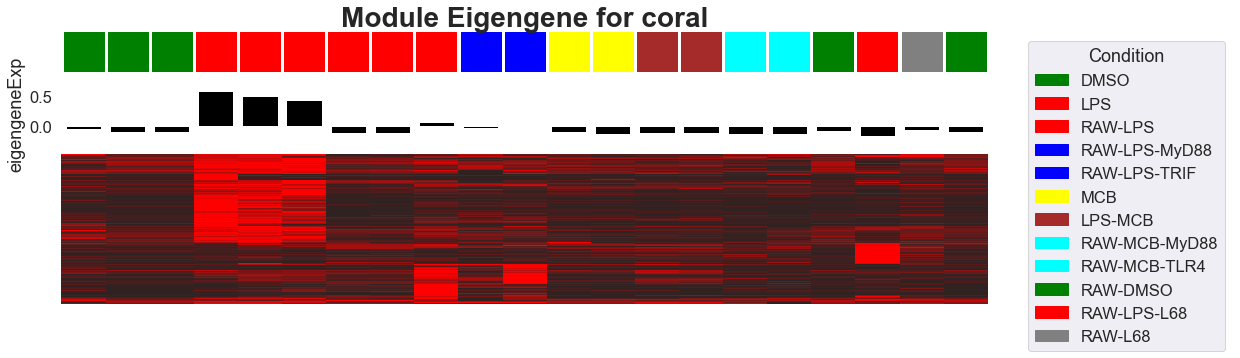

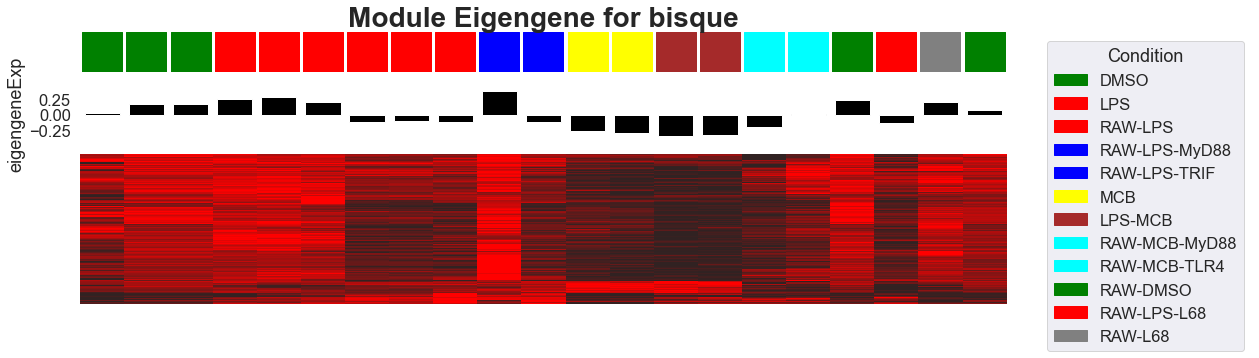

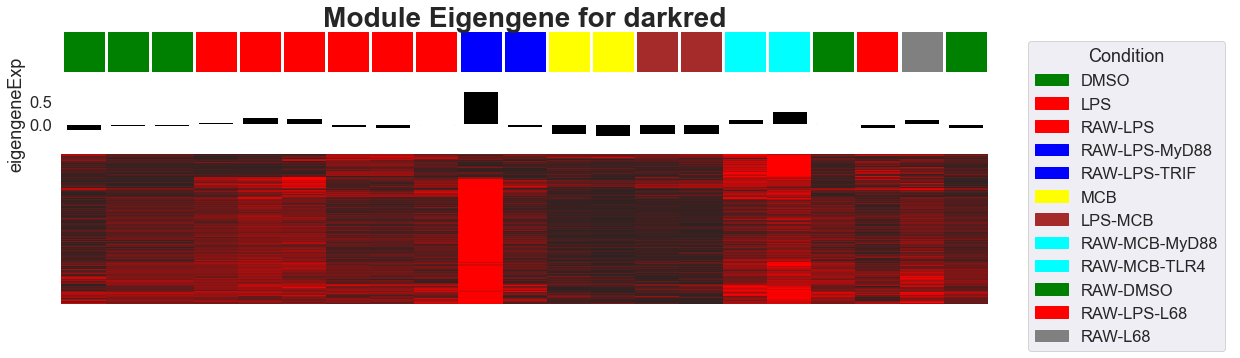

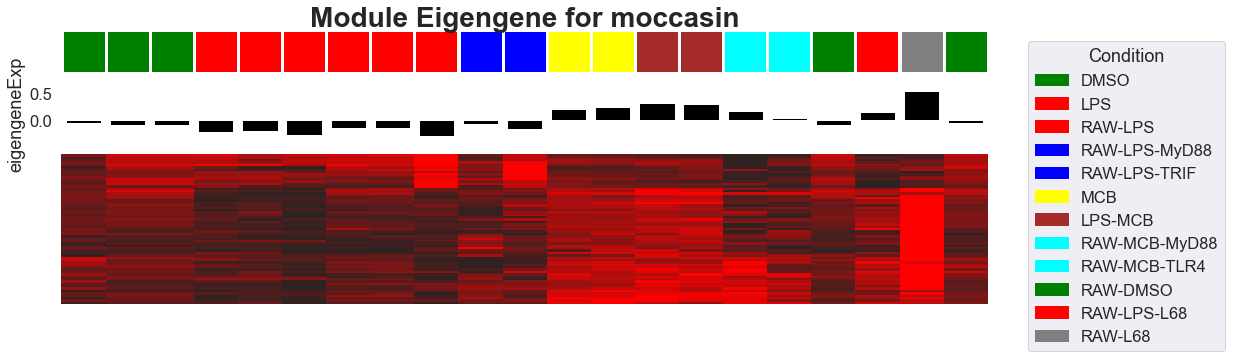

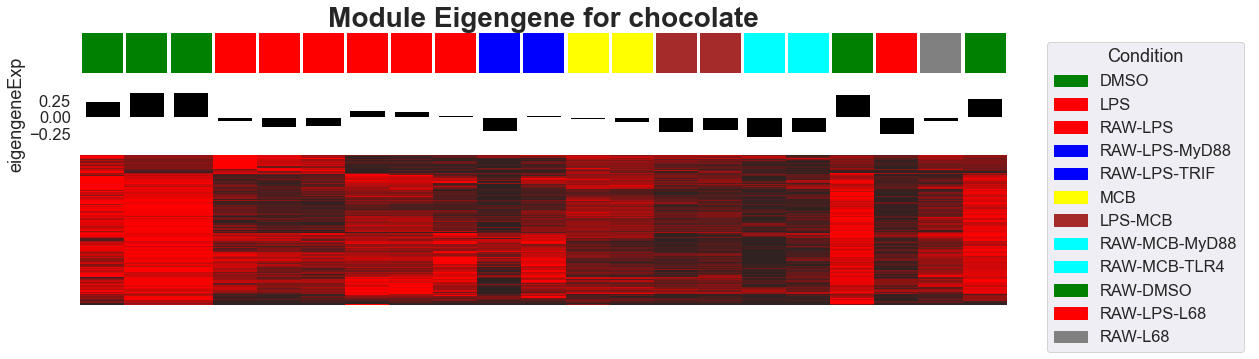

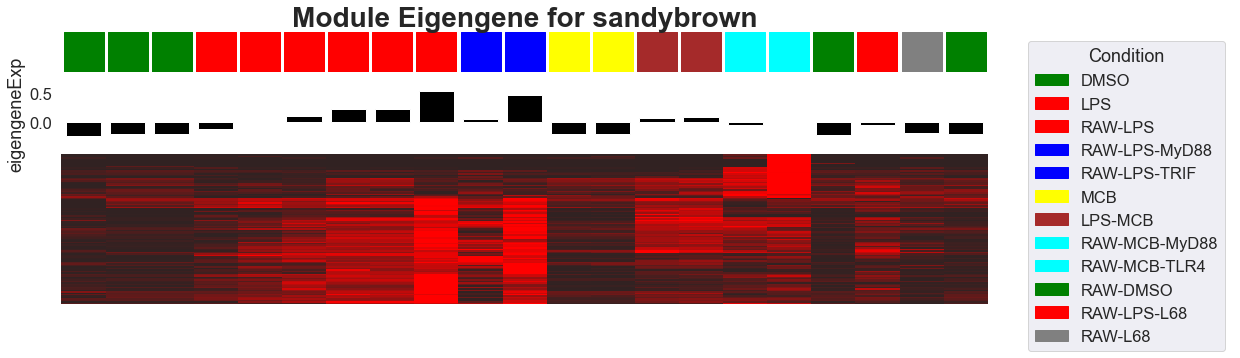

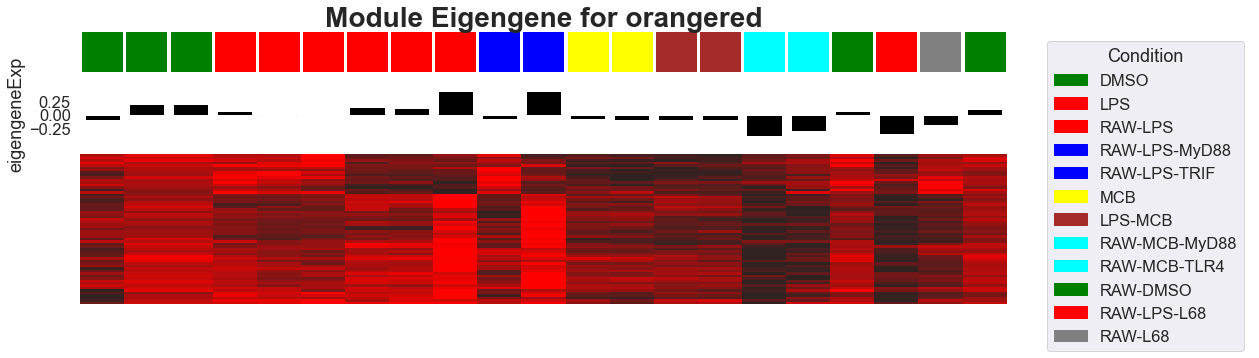

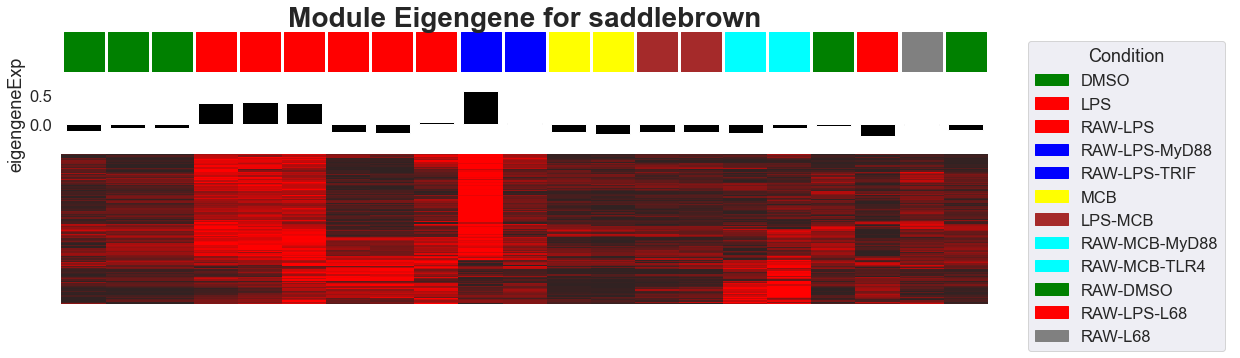

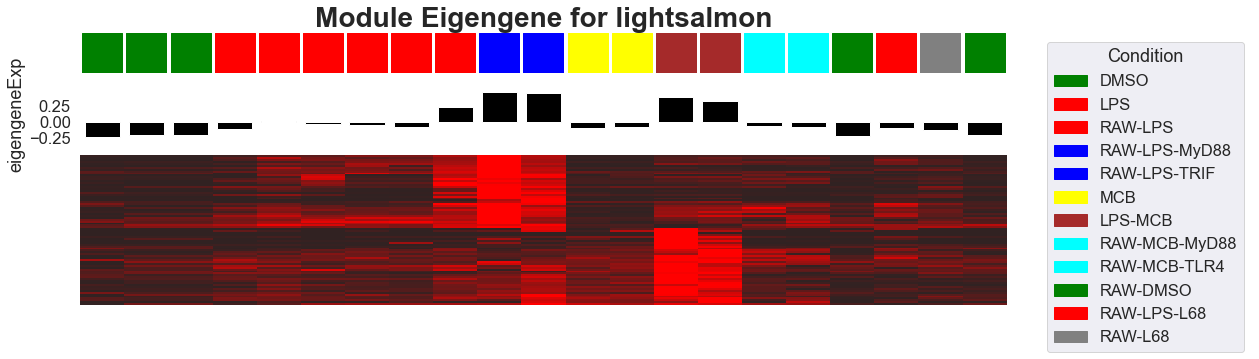

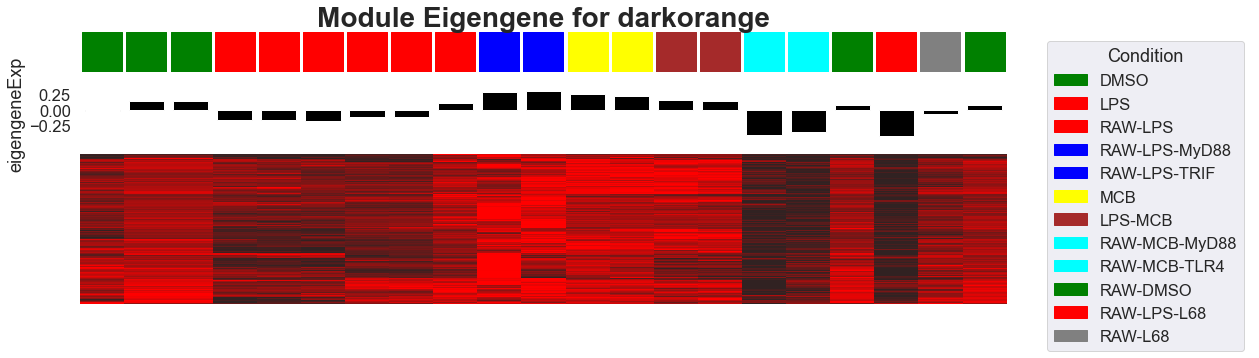

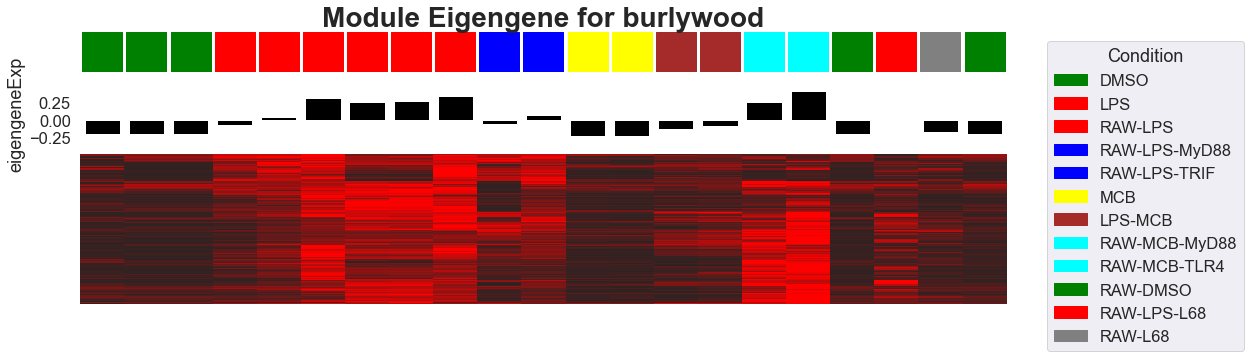

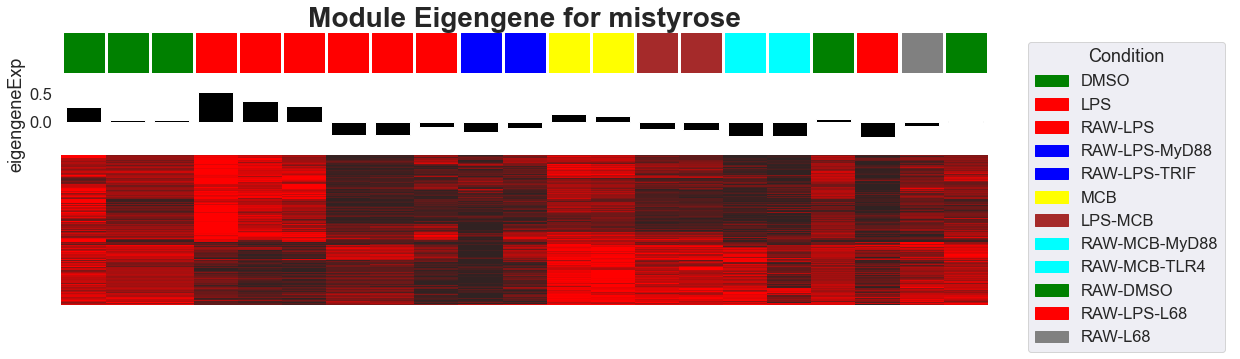

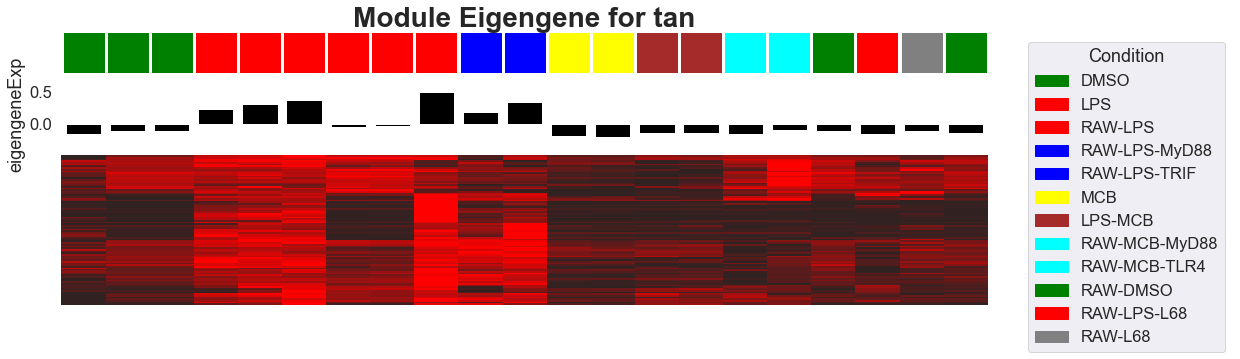

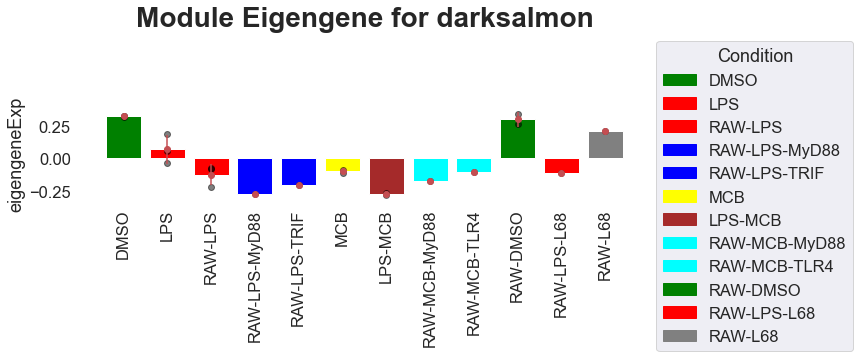

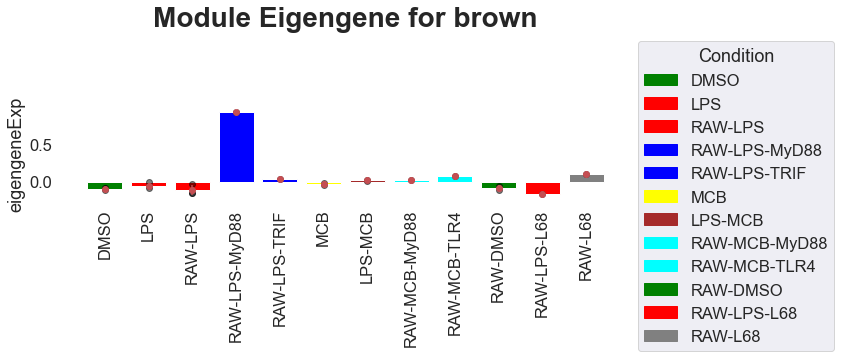

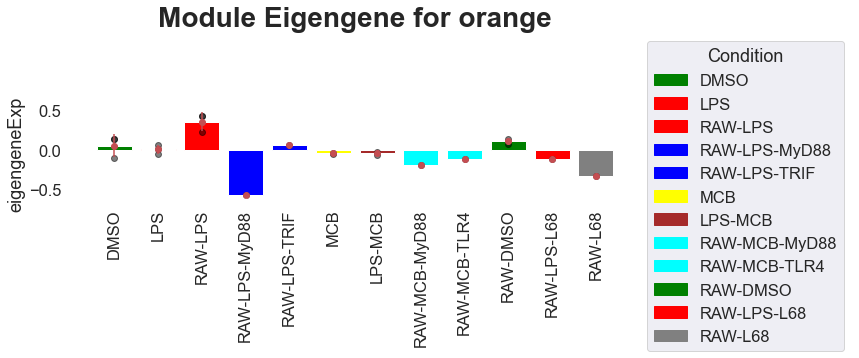

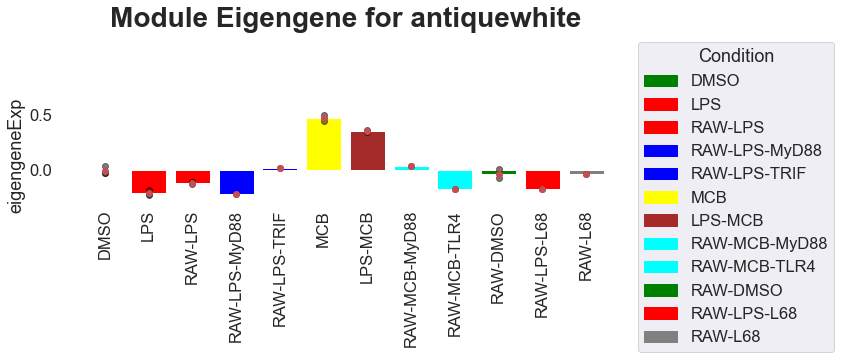

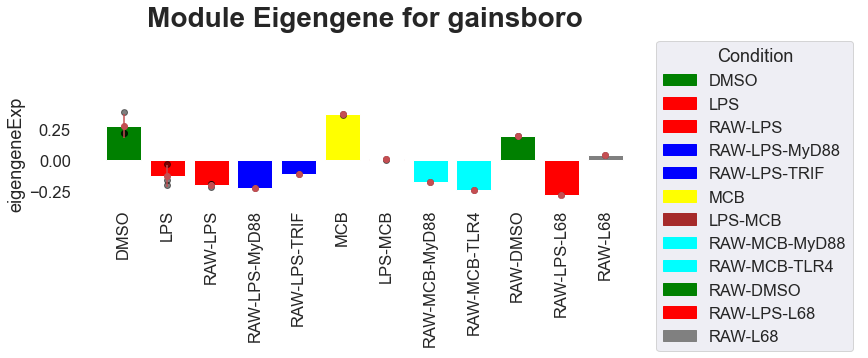

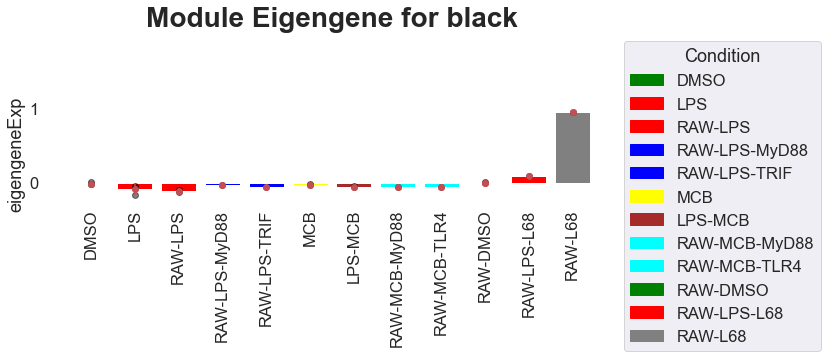

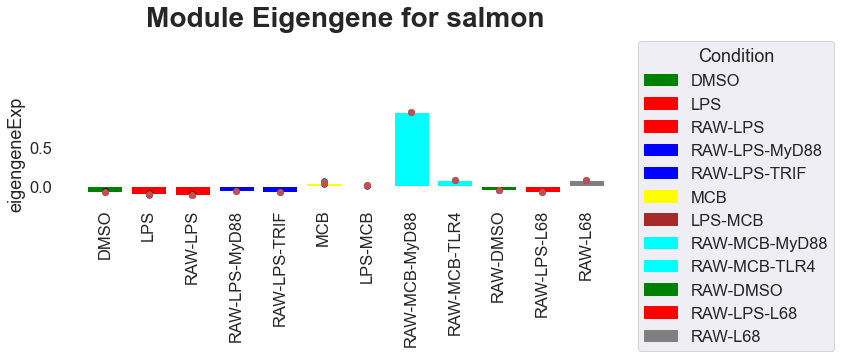

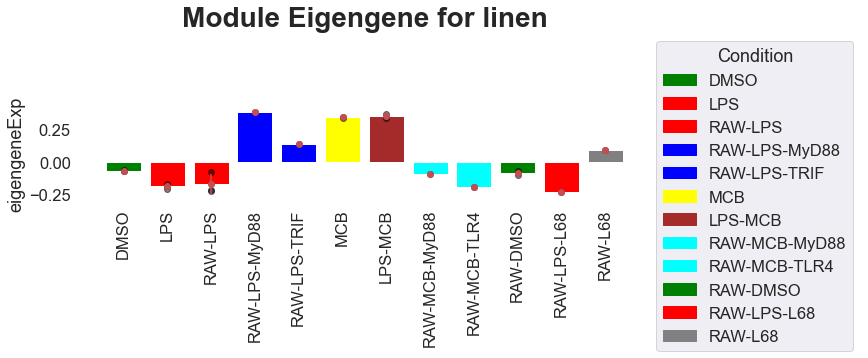

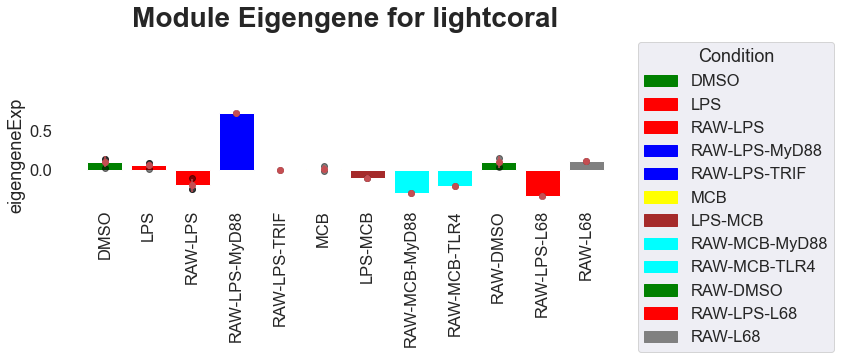

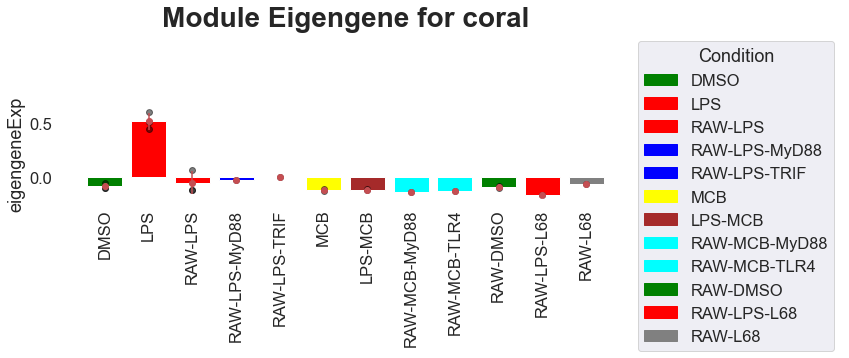

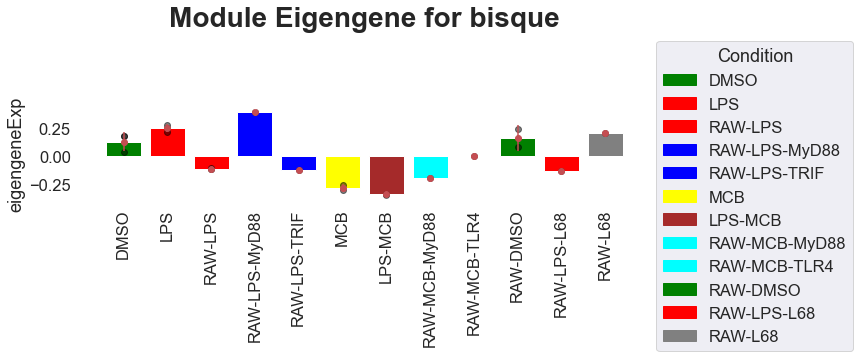

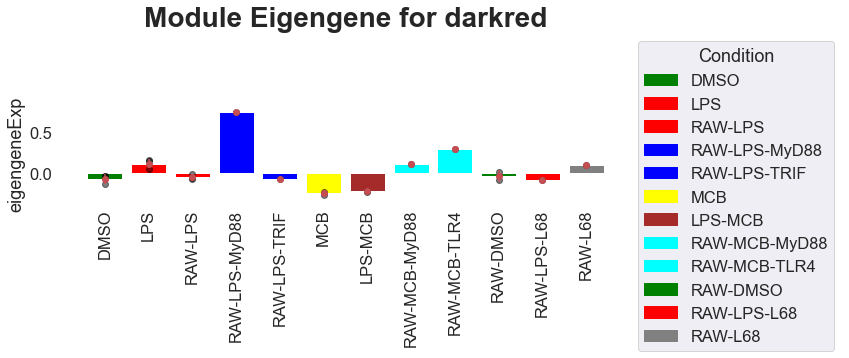

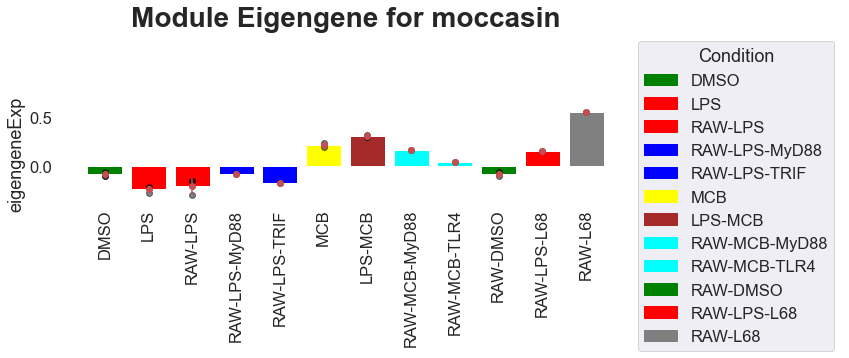

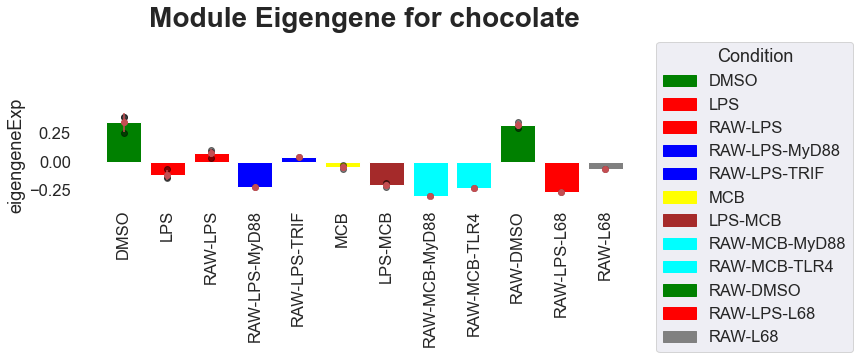

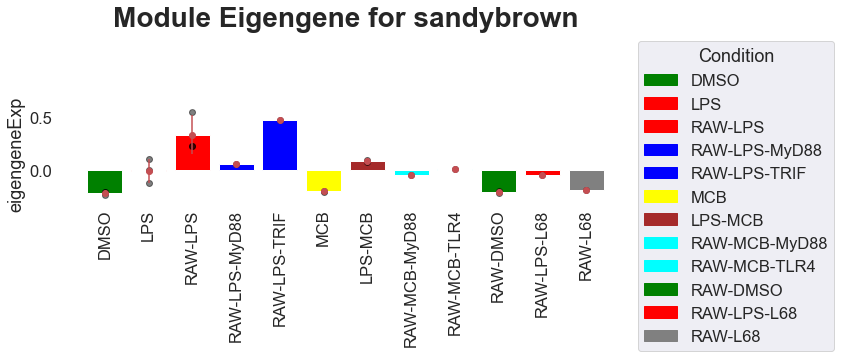

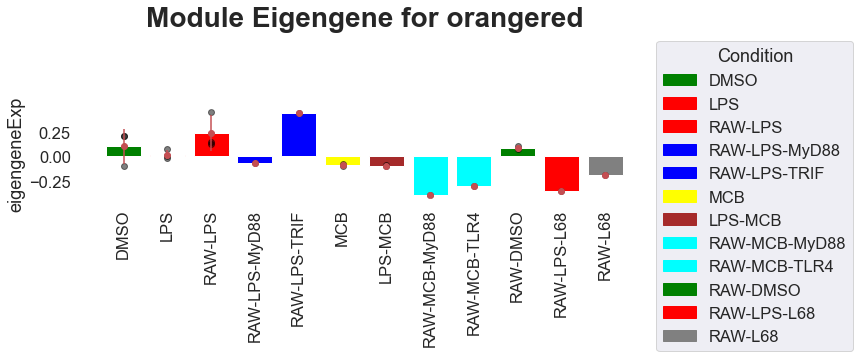

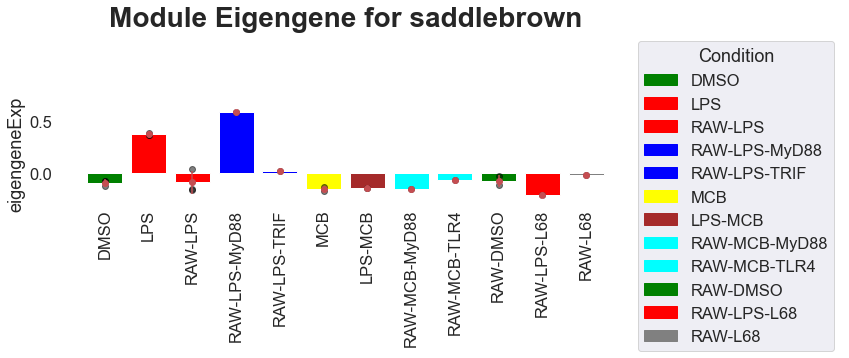

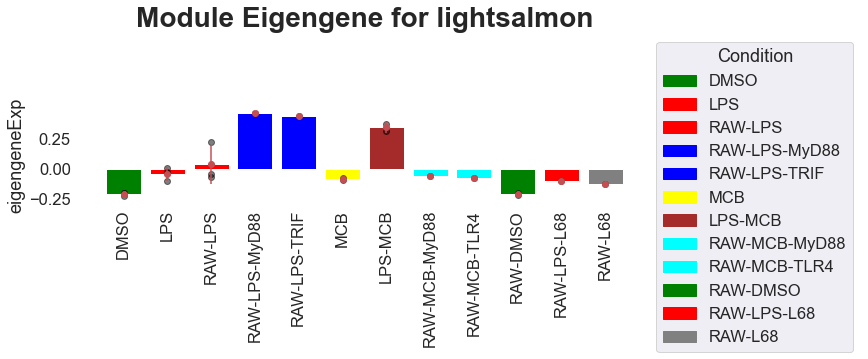

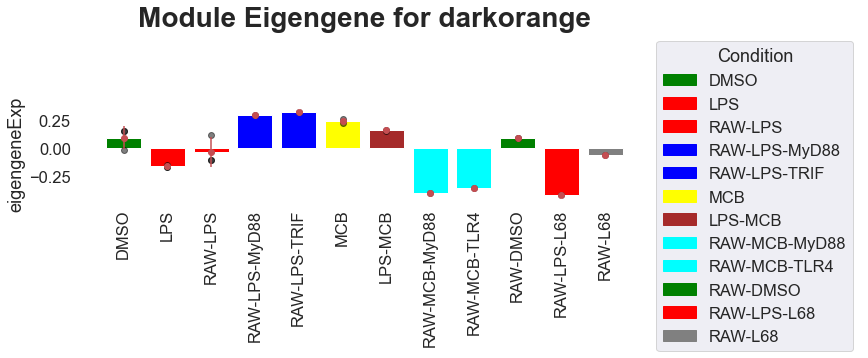

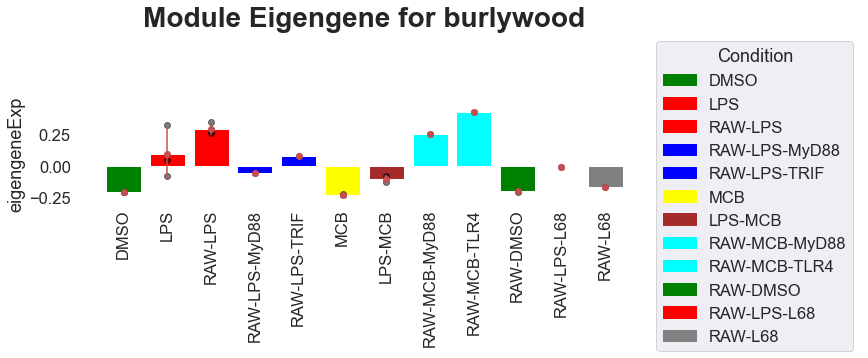

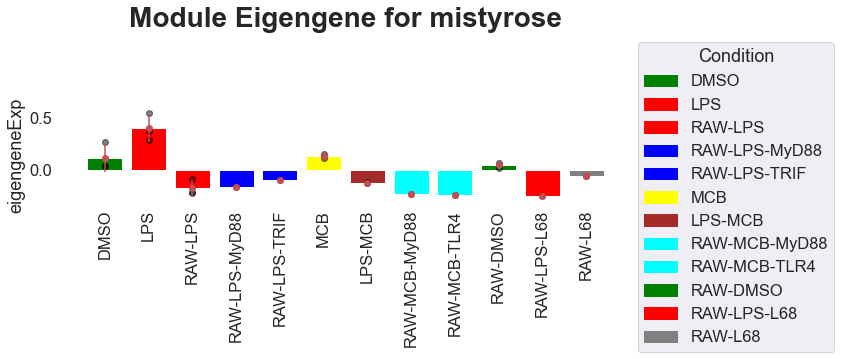

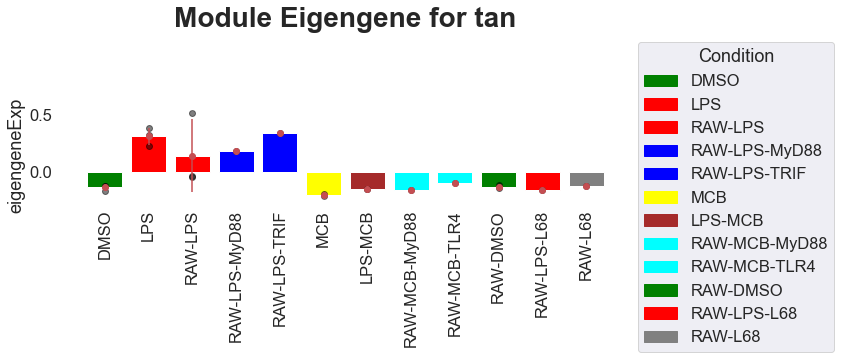

In [35]:
pyWGCNA_5xFAD.analyseWGCNA()

In [36]:
pyWGCNA_5xFAD.saveWGCNA()

Saving WGCNA as MCB.p


In [54]:
pyWGCNA_5xFAD.getModuleName()

['antiquewhite',
 'bisque',
 'black',
 'brown',
 'burlywood',
 'chocolate',
 'coral',
 'darkorange',
 'darkred',
 'darksalmon',
 'gainsboro',
 'lightcoral',
 'lightsalmon',
 'linen',
 'mistyrose',
 'moccasin',
 'orange',
 'orangered',
 'saddlebrown',
 'salmon',
 'sandybrown',
 'tan']

In [58]:
help(pyWGCNA_5xFAD.top_n_hub_genes)

Help on method top_n_hub_genes in module PyWGCNA.wgcna:

top_n_hub_genes(moduleName, n=10) method of PyWGCNA.wgcna.WGCNA instance
    find top n hub genes based on connectivity in given module
    
    :param moduleName: name of module you want to top n hub genes
    :type moduleName: str
    :param n: number of top hub genes
    :type n: int
    
    :return: dataframe contains top n hun genes along with connectivity score and additional gene information you added to your expression matrix
    :rtype: pandas dataframe



In [59]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName='orange', n=20)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels gene_name
Myh6          5.149584        orange       orange          16.0      Myh6
Mb            4.960558        orange       orange          16.0        Mb
Myl2          4.697870        orange       orange          16.0      Myl2
Myh4          4.587872        orange       orange          16.0      Myh4
Pln           4.490083        orange       orange          16.0       Pln
Actc1         4.389557        orange       orange          16.0     Actc1
Pvalb         4.350059        orange       orange          16.0     Pvalb
Acta1         4.247016        orange       orange          16.0     Acta1
Atp2a1        4.090977        orange       orange          16.0    Atp2a1
Mir6994       3.748359        orange       orange          16.0   Mir6994
Mir194-2      3.748359        orange       orange          16.0  Mir194-2
Mir3110       3.748359        orange       orange          16.0   Mir3110
Mir700        3.721292        orange       orange          16.0    Mir700
Mir335        3.721292        orange       orange          16.0    Mir335
Myl3          3.669194        orange       orange          16.0      Myl3
Ckm           3.527293        orange       orange          16.0       Ckm
Actn3         3.418922        orange       orange          16.0     Actn3
Postn         3.079220        orange       orange          16.0     Postn
Col1a2        3.045722        orange       orange          16.0    Col1a2
Fn1           2.781629        orange       orange          16.0       Fn1

In [50]:
geneExpAll = geneExpData.T
geneExpAll

DMSO1  DMSO2  DMSO3  LPS-1h  LPS-2h  LPS-3h  RAW-LPS_1  \
Geneid                                                                  
0610005C13Rik   0.26   0.04   0.04    0.11    0.05    0.23       0.23   
0610009B22Rik  26.39  25.77  25.77   17.47   12.64   11.30      14.60   
0610009E02Rik   0.19   0.18   0.18    0.00    0.03    0.08       0.16   
0610009L18Rik   0.76   0.59   0.59    0.19    0.51    0.31       0.21   
0610010F05Rik  11.72  11.60  11.60   10.87    9.35    9.37      12.66   
...              ...    ...    ...     ...     ...     ...        ...   
Zyx             4.42   1.91   1.91   12.74   14.10   17.19       8.40   
Zzef1           9.45   7.87   7.87    6.88    3.66    4.35       4.82   
Zzz3           21.17  14.33  14.33   13.50   14.92   10.15      24.60   
a               0.42   0.06   0.06    0.00    0.00    0.00       0.00   
ccdc198         0.00   0.00   0.00    0.00    0.09    0.00       0.00   

               RAW_LPS_2  RAW-LPS_3  RAW-LPS-MyD88  ...   MCB1   MCB2  \
Geneid                                              ...                 
0610005C13Rik       0.18       0.11           0.11  ...   0.14   0.18   
0610009B22Rik      12.51      10.59          18.17  ...  15.55  13.06   
0610009E02Rik       0.06       0.00           0.40  ...   0.20   0.22   
0610009L18Rik       0.24       0.78           4.12  ...   0.42   0.00   
0610010F05Rik      13.09      13.14           5.56  ...   7.54   7.49   
...                  ...        ...            ...  ...    ...    ...   
Zyx                 8.07      14.08          20.81  ...   2.57   2.34   
Zzef1               5.17       4.97           2.04  ...   8.47   8.65   
Zzz3               24.59      18.48          12.52  ...  28.13  30.24   
a                   0.15       0.00           0.45  ...   0.22   0.19   
ccdc198             0.04       0.00           0.16  ...   0.00   0.00   

               LPS-MCB1  LPS-MCB2  RAW-MCB-MyD88  RAW-MCB-TLR4  RAW-L68C  \
Geneid                                                                     
0610005C13Rik      0.10      0.11           0.11          0.11      0.08   
0610009B22Rik      5.06      9.60           7.35         15.10     24.26   
0610009E02Rik      0.04      0.00           0.08          0.16      0.27   
0610009L18Rik      0.27      0.10           0.50          0.41      0.30   
0610010F05Rik      3.28      3.91           8.21          9.79     10.35   
...                 ...       ...            ...           ...       ...   
Zyx                4.56      5.23           3.67         12.04      1.98   
Zzef1              6.98      5.66           4.81          3.52      7.16   
Zzz3              27.68     25.08          28.40         23.28     14.39   
a                  0.08      0.00           0.00          0.19      0.00   
ccdc198            0.15      0.11           0.43          0.06      0.20   

               RAW-LPS-L68  RAW-L68  RAW-Fe68  
Geneid                                         
0610005C13Rik         0.07     0.09      0.17  
0610009B22Rik         6.37    22.51     20.67  
0610009E02Rik         0.00     0.25      0.25  
0610009L18Rik         0.13     0.24      0.16  
0610010F05Rik         8.99     9.19     10.99  
...                    ...      ...       ...  
Zyx                   5.52     3.87      2.22  
Zzef1                 3.66     5.55      8.20  
Zzz3                 31.20    31.10     17.78  
a                     0.06     0.00      0.00  
ccdc198               0.00     0.08      0.12  

[25239 rows x 21 columns]

In [46]:
len(pyWGCNA_5xFAD.getModuleName())

22

In [53]:
pyWGCNA_5xFAD.getModuleName()

['antiquewhite',
 'bisque',
 'black',
 'brown',
 'burlywood',
 'chocolate',
 'coral',
 'darkorange',
 'darkred',
 'darksalmon',
 'gainsboro',
 'lightcoral',
 'lightsalmon',
 'linen',
 'mistyrose',
 'moccasin',
 'orange',
 'orangered',
 'saddlebrown',
 'salmon',
 'sandybrown',
 'tan']

In [71]:
moduleGenes = pyWGCNA_5xFAD.getGeneModule('antiquewhite')['antiquewhite']['gene_name'].to_list()
moduleGenes[:10]

['0610030E20Rik',
 '1110012L19Rik',
 '1110051M20Rik',
 '1700012D01Rik',
 '1700023D09Rik',
 '1700028J19Rik',
 '1700084E18Rik',
 '1700109K24Rik',
 '1810013A23Rik',
 '2310043M15Rik']

In [72]:
DEGs = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/DEGs/DEGs_LPS3-MCB2_Sig.csv')
DEGs

Geneid     baseMean  log2FoldChange     lfcSE       stat        pvalue  \
0       Gstp3    48.514689        8.953148  2.416138   3.705561  2.109230e-04   
1     Siglech    30.048593        8.261587  2.443449   3.381117  7.219170e-04   
2       Crtam    28.508771        8.187268  2.452713   3.338046  8.436970e-04   
3      Lman1l    24.074943        7.942608  2.461598   3.226606  1.252677e-03   
4       Morn4    19.660826        7.650501  2.481764   3.082687  2.051409e-03   
...       ...          ...             ...       ...        ...           ...   
1206     Ska2   257.692818       -2.016067  0.754084  -2.673532  7.505711e-03   
1207   Gemin6   248.826079       -2.011772  0.237937  -8.455066  2.789301e-17   
1208    Eno1b  6433.765868       -2.008963  0.122975 -16.336318  5.444257e-60   
1209    Fancb   183.173534       -2.005601  0.271928  -7.375484  1.637487e-13   
1210   Rhbdd2   344.778510       -2.000858  0.222861  -8.978050  2.756071e-19   

              padj  
0     5.950433e-04  
1     1.868134e-03  
2     2.154780e-03  
3     3.108949e-03  
4     4.914706e-03  
...            ...  
1206  1.598615e-02  
1207  2.711226e-16  
1208  2.757996e-58  
1209  1.217092e-12  
1210  3.074503e-18  

[1211 rows x 7 columns]

In [76]:
DEGsWGCNA = DEGs[DEGs['Geneid'].isin(moduleGenes)].sort_values('log2FoldChange', ascending=False).reset_index(drop=True)
DEGsWGCNA

Geneid     baseMean  log2FoldChange     lfcSE       stat  \
0     Siglech    30.048593        8.261587  2.443449   3.381117   
1      Lman1l    24.074943        7.942608  2.461598   3.226606   
2       Morn4    19.660826        7.650501  2.481764   3.082687   
3    Rasgef1a    15.732720        7.328914  2.508507   2.921623   
4         Sds    30.324986        6.831047  1.558109   4.384190   
..        ...          ...             ...       ...        ...   
260     Mcm10   457.719753       -3.670765  0.587920  -6.243643   
261    Mcemp1    27.250879       -3.760959  0.796704  -4.720646   
262   Siglece   520.113060       -4.270612  0.222069 -19.230988   
263    Rbfox1   843.816584       -4.444308  0.184944 -24.030544   
264      Saa3  1490.289837       -6.484457  0.451950 -14.347746   

            pvalue           padj  
0     7.219170e-04   1.868134e-03  
1     1.252677e-03   3.108949e-03  
2     2.051409e-03   4.914706e-03  
3     3.482122e-03   7.982619e-03  
4     1.164183e-05   3.959693e-05  
..             ...            ...  
260   4.274950e-10   2.347951e-09  
261   2.350968e-06   8.752105e-06  
262   2.037092e-82   1.665516e-80  
263  1.333683e-127  2.328177e-125  
264   1.100559e-46   3.832081e-45  

[265 rows x 7 columns]

In [85]:
geneExpAll=geneExpData.T.reset_index()
geneExpAll

Geneid  DMSO1  DMSO2  DMSO3  LPS-1h  LPS-2h  LPS-3h  RAW-LPS_1  \
0      0610005C13Rik   0.26   0.04   0.04    0.11    0.05    0.23       0.23   
1      0610009B22Rik  26.39  25.77  25.77   17.47   12.64   11.30      14.60   
2      0610009E02Rik   0.19   0.18   0.18    0.00    0.03    0.08       0.16   
3      0610009L18Rik   0.76   0.59   0.59    0.19    0.51    0.31       0.21   
4      0610010F05Rik  11.72  11.60  11.60   10.87    9.35    9.37      12.66   
...              ...    ...    ...    ...     ...     ...     ...        ...   
25234            Zyx   4.42   1.91   1.91   12.74   14.10   17.19       8.40   
25235          Zzef1   9.45   7.87   7.87    6.88    3.66    4.35       4.82   
25236           Zzz3  21.17  14.33  14.33   13.50   14.92   10.15      24.60   
25237              a   0.42   0.06   0.06    0.00    0.00    0.00       0.00   
25238        ccdc198   0.00   0.00   0.00    0.00    0.09    0.00       0.00   

       RAW_LPS_2  RAW-LPS_3  ...   MCB1   MCB2  LPS-MCB1  LPS-MCB2  \
0           0.18       0.11  ...   0.14   0.18      0.10      0.11   
1          12.51      10.59  ...  15.55  13.06      5.06      9.60   
2           0.06       0.00  ...   0.20   0.22      0.04      0.00   
3           0.24       0.78  ...   0.42   0.00      0.27      0.10   
4          13.09      13.14  ...   7.54   7.49      3.28      3.91   
...          ...        ...  ...    ...    ...       ...       ...   
25234       8.07      14.08  ...   2.57   2.34      4.56      5.23   
25235       5.17       4.97  ...   8.47   8.65      6.98      5.66   
25236      24.59      18.48  ...  28.13  30.24     27.68     25.08   
25237       0.15       0.00  ...   0.22   0.19      0.08      0.00   
25238       0.04       0.00  ...   0.00   0.00      0.15      0.11   

       RAW-MCB-MyD88  RAW-MCB-TLR4  RAW-L68C  RAW-LPS-L68  RAW-L68  RAW-Fe68  
0               0.11          0.11      0.08         0.07     0.09      0.17  
1               7.35         15.10     24.26         6.37    22.51     20.67  
2               0.08          0.16      0.27         0.00     0.25      0.25  
3               0.50          0.41      0.30         0.13     0.24      0.16  
4               8.21          9.79     10.35         8.99     9.19     10.99  
...              ...           ...       ...          ...      ...       ...  
25234           3.67         12.04      1.98         5.52     3.87      2.22  
25235           4.81          3.52      7.16         3.66     5.55      8.20  
25236          28.40         23.28     14.39        31.20    31.10     17.78  
25237           0.00          0.19      0.00         0.06     0.00      0.00  
25238           0.43          0.06      0.20         0.00     0.08      0.12  

[25239 rows x 22 columns]

In [134]:
geneExpAll = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/FPKM/gene_fpkm_VB12_LPS_All.csv')
geneExpAll.head()

Geneid  DMSO1  DMSO2  RAW-L68C  RAW-Fe68  LPS-1h  LPS-2h  LPS-3h  \
0  0610005C13Rik   0.26   0.04      0.08      0.17    0.11    0.05    0.23   
1  0610009B22Rik  26.39  25.77     24.26     20.67   17.47   12.64   11.30   
2  0610009E02Rik   0.19   0.18      0.27      0.25    0.00    0.03    0.08   
3  0610009L18Rik   0.76   0.59      0.30      0.16    0.19    0.51    0.31   
4  0610010F05Rik  11.72  11.60     10.35     10.99   10.87    9.35    9.37   

   RAW-LPS_1  RAW_LPS_2  RAW-LPS_3  RAW-LPS-MyD88  RAW-LPS-TRIF   MCB1   MCB2  \
0       0.23       0.18       0.11           0.11          0.00   0.14   0.18   
1      14.60      12.51      10.59          18.17         13.63  15.55  13.06   
2       0.16       0.06       0.00           0.40          0.04   0.20   0.22   
3       0.21       0.24       0.78           4.12          0.98   0.42   0.00   
4      12.66      13.09      13.14           5.56         12.29   7.54   7.49   

   LPS-MCB1  LPS-MCB2  RAW-MCB-MyD88  RAW-MCB-TLR4  RAW-LPS-L68  RAW-L68  
0      0.10      0.11           0.11          0.11         0.07     0.09  
1      5.06      9.60           7.35         15.10         6.37    22.51  
2      0.04      0.00           0.08          0.16         0.00     0.25  
3      0.27      0.10           0.50          0.41         0.13     0.24  
4      3.28      3.91           8.21          9.79         8.99     9.19

In [149]:
markerGenes = geneExpAll[geneExpAll['Geneid'].str.contains('Cd14|Tlr',flags=re.IGNORECASE)].set_index('Geneid')
markerGenes[markerGenes.apply(np.mean, axis=1)>1]


DMSO1   DMSO2  RAW-L68C  RAW-Fe68   LPS-1h   LPS-2h   LPS-3h  \
Geneid                                                                  
Cd14    143.75  189.46    197.71    184.79  1044.29  1136.82  1522.77   
Tlr1     11.69    6.55      6.53      5.89     2.80     4.50    12.62   
Tlr13    42.00   13.51     20.77     16.52    18.76    10.75     2.97   
Tlr2    110.40   58.76     72.96     80.33   170.57   426.62   250.17   
Tlr4     33.15   19.35     17.46     23.24     6.89     3.31     3.72   
Tlr6     11.92    4.87      5.51      5.72     3.93     4.69     7.93   
Tlr7    108.34   43.97     57.83     55.50    42.75    36.74    31.20   
Tlr9      4.87    1.32      1.87      1.78     1.47     5.24     3.63   

        RAW-LPS_1  RAW_LPS_2  RAW-LPS_3  RAW-LPS-MyD88  RAW-LPS-TRIF   MCB1  \
Geneid                                                                        
Cd14       901.76     940.74     524.91         447.44        263.07  47.94   
Tlr1        20.96      19.31      18.51           3.38         11.22   7.30   
Tlr13        0.79       0.69       1.02           0.51          0.59   3.04   
Tlr2       295.78     289.69     296.98         292.13        277.38  78.48   
Tlr4         7.66       7.21       3.64           2.68          5.08  13.70   
Tlr6         5.90       6.47       6.08           2.01          4.51   6.77   
Tlr7        15.27      16.48      23.41           6.49          9.93  13.99   
Tlr9         2.74       3.03       2.22           0.22          3.09   0.93   

         MCB2  LPS-MCB1  LPS-MCB2  RAW-MCB-MyD88  RAW-MCB-TLR4  RAW-LPS-L68  \
Geneid                                                                        
Cd14    40.14    316.01    409.57         125.70        356.97       499.79   
Tlr1     6.38      5.96      8.65           6.47         12.88         6.73   
Tlr13    3.36      0.40      0.47           0.93          0.85         2.98   
Tlr2    77.27    128.97    156.74         100.13        145.11       216.74   
Tlr4    13.65      6.50     10.70           3.47          8.71        10.79   
Tlr6     5.21      2.74      3.63           1.31          1.90         1.95   
Tlr7    11.67      7.61     10.33           6.95         15.86        34.01   
Tlr9     0.95      1.81      1.67           0.38          1.29        10.07   

        RAW-L68  
Geneid           
Cd14     268.74  
Tlr1       3.40  
Tlr13     11.10  
Tlr2     261.73  
Tlr4      17.39  
Tlr6       3.76  
Tlr7      63.59  
Tlr9       3.05

In [136]:
genehub = geneExpAll[geneExpAll['Geneid'].isin(list(DEGsWGCNA['Geneid']))].set_index('Geneid').loc[DEGsWGCNA['Geneid'].to_list(), :'RAW-MCB-TLR4']
# genehub = genehub.iloc[:,:18].set_index('Geneid')
genehub = genehub[genehub.apply(max, axis=1)>10]
genehub

DMSO1  DMSO2  RAW-L68C  RAW-Fe68  LPS-1h  LPS-2h  LPS-3h  RAW-LPS_1  \
Geneid                                                                         
Efna1     4.31   2.33      2.07      1.29    0.77    0.23    0.35       0.08   
Klf11     4.36   2.55      3.01      2.14    5.68    1.86    0.11       0.40   
Klhl24   40.39  11.32      9.90     14.80    1.57    1.23    0.34       1.15   
Pdcd4    33.72  12.20      9.42     13.28    3.12    2.52    1.27       0.70   
Slc37a2  45.09  22.84     34.27     28.17   16.03   10.99    4.52       2.54   
...        ...    ...       ...       ...     ...     ...     ...        ...   
Igsf6    38.76  30.19     22.56     24.74   63.26   63.00   38.13      34.68   
Mcm10    13.60  22.98     20.79     18.48   27.92   25.21   22.82      10.91   
Siglece   5.94   2.53      3.17      2.35    1.81    1.54    1.72      26.32   
Rbfox1    0.72   1.30      1.30      1.79    0.21    0.18    0.27      11.50   
Saa3      1.21   0.92      2.37     13.25    4.96   14.84  132.05     304.32   

         RAW_LPS_2  RAW-LPS_3  RAW-LPS-MyD88  RAW-LPS-TRIF   MCB1   MCB2  \
Geneid                                                                     
Efna1         0.09       0.04           0.72          0.33  11.64  10.92   
Klf11         0.29       0.24           0.81          0.67  12.57  13.75   
Klhl24        1.08       0.60           1.45          1.59  81.07  97.17   
Pdcd4         0.75       1.39          13.49          4.57  51.81  50.54   
Slc37a2       2.85       2.82           3.73          4.34  27.98  28.48   
...            ...        ...            ...           ...    ...    ...   
Igsf6        37.10      16.75           0.96          3.85   6.50   6.07   
Mcm10        11.97       7.81           4.12          6.22   1.50   1.25   
Siglece      30.57       6.11           1.52          1.51   1.03   1.79   
Rbfox1       11.50       1.80           0.30          0.86   0.32   0.24   
Saa3        286.04      87.32          10.20          4.47   1.65   0.76   

         LPS-MCB1  LPS-MCB2  RAW-MCB-MyD88  RAW-MCB-TLR4  
Geneid                                                    
Efna1        6.25      3.80           0.76          0.43  
Klf11       14.57     11.48          18.61          1.43  
Klhl24      39.81     37.41          39.25          7.03  
Pdcd4       24.57     18.87          32.27          1.71  
Slc37a2     78.61     78.90           4.15          3.37  
...           ...       ...            ...           ...  
Igsf6        3.61      3.40          31.27         53.48  
Mcm10        0.63      1.55          14.18         11.98  
Siglece      1.53      2.05          19.13         32.25  
Rbfox1       0.55      0.74           8.20          9.43  
Saa3         2.56      5.46         912.47        847.16  

[117 rows x 18 columns]

In [220]:
##筛选MCB的高表达基因
import numpy as np
genehubMCB = genehub[genehub.loc[:,['MCB1','MCB2']].apply(np.mean, axis=1)>20]
genehubMCB = genehubMCB.drop('DMSO1', axis=1)
genehubMCB.head()

DMSO2  RAW-L68C  RAW-Fe68  LPS-1h  LPS-2h  LPS-3h  RAW-LPS_1  \
Geneid                                                                   
Klhl24    11.32      9.90     14.80    1.57    1.23    0.34       1.15   
Pdcd4     12.20      9.42     13.28    3.12    2.52    1.27       0.70   
Slc37a2   22.84     34.27     28.17   16.03   10.99    4.52       2.54   
Nr1d2     10.12      7.48     13.33   14.68   13.92    2.73       1.51   
Txnip    178.81    208.51    197.13   51.60   43.56   65.73      31.42   

         RAW_LPS_2  RAW-LPS_3  RAW-LPS-MyD88  RAW-LPS-TRIF    MCB1    MCB2  \
Geneid                                                                       
Klhl24        1.08       0.60           1.45          1.59   81.07   97.17   
Pdcd4         0.75       1.39          13.49          4.57   51.81   50.54   
Slc37a2       2.85       2.82           3.73          4.34   27.98   28.48   
Nr1d2         1.35       3.28           3.07          5.26   46.78   53.21   
Txnip        34.23      38.93          40.45         60.81  534.38  514.70   

         LPS-MCB1  LPS-MCB2  RAW-MCB-MyD88  RAW-MCB-TLR4  
Geneid                                                    
Klhl24      39.81     37.41          39.25          7.03  
Pdcd4       24.57     18.87          32.27          1.71  
Slc37a2     78.61     78.90           4.15          3.37  
Nr1d2       36.97     31.38          18.65          2.79  
Txnip      763.46    589.45         105.59         26.01

In [191]:
def color_yellow(col):
    colors = ['background-color: cyan' if col.name in ['MCB1','MCB2'] else '' for value in col]
    return colors

In [213]:
def color_columns(col):
    if col.name in ['RAW-LPS_1','RAW_LPS_2']:
        return ['background-color: red'] * len(col)
    elif col.name in ['MCB1','MCB2']:
        return ['background-color: cyan'] * len(col)
    else:
        return [''] * len(col)  # 默认背景色为空

In [ ]:
['Txnip', 'Hspa4l', 'Itm2c', 'Oga', 'Klhl24', 'B4galt1', 'Slc25a30',
       'Nbr1', 'Rmnd5a', 'Pnrc1', 'Atg12', 'Atg14', 'Tgfbr1', 'Aoc2','Pdcd4']

In [224]:
markerMCB.index[:10]

Index(['Txnip', 'Hspa4l', 'Itm2c', 'Oga', 'Klhl24', 'B4galt1', 'Slc25a30',
       'Nbr1', 'Rmnd5a', 'Pnrc1'],
      dtype='object', name='Geneid')

In [222]:
###对MCB的表达进行降序排列
genehubMCB['averMCB'] = genehubMCB.loc[:,['MCB1','MCB2']].apply(np.mean, axis=1)
genehubMCB['averLPS'] = genehubMCB.loc[:,['RAW-LPS_1','RAW_LPS_2']].apply(np.mean, axis=1)
# genehubMCB = genehubMCB.loc[:,['MCB1','MCB2']].style.pipe(color_yellow)
# styled_df = genehubMCB.style.apply(color_yellow)
# 
markerMCB = genehubMCB[genehubMCB['averMCB']>genehubMCB['averLPS']].sort_values('averMCB', ascending=False).style.apply(color_columns)
markerMCB

In [223]:
genehubMCB[genehubMCB['averMCB']<genehubMCB['averLPS']].sort_values('averLPS', ascending=False).style.apply(color_columns)